In [ ]:
import pandas as pd

db = pd.read_csv('./campaign1.csv')
db.columns

Index(['campaign_item_id', 'no_of_days', 'time', 'ext_service_id',
       'ext_service_name', 'creative_id', 'creative_width', 'creative_height',
       'search_tags', 'template_id', 'landing_page', 'advertiser_id',
       'advertiser_name', 'network_id', 'approved_budget',
       'advertiser_currency', 'channel_id', 'channel_name', 'max_bid_cpm',
       'network_margin', 'campaign_budget_usd', 'impressions', 'clicks',
       'stats_currency', 'currency_code', 'exchange_rate', 'media_cost_usd',
       'position_in_content', 'unique_reach', 'total_reach', 'search_tag_cat',
       'cmi_currency_code', 'timezone', 'weekday_cat', 'keywords'],
      dtype='object')

In [ ]:
db.head()

,campaign_item_id,no_of_days,time,ext_service_id,ext_service_name,creative_id,creative_width,creative_height,search_tags,template_id,...,exchange_rate,media_cost_usd,position_in_content,unique_reach,total_reach,search_tag_cat,cmi_currency_code,timezone,weekday_cat,keywords
0,2733,7,2022-05-01,128,Facebook Ads,1000,300.0,250.0,#The Power of X,90.0,...,1,14.058514,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_end,delicate bracelets
1,2733,8,2022-05-02,16,DV360,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,99.633496,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,summer jewelry
2,2733,9,2022-05-03,128,Facebook Ads,1000,300.0,250.0,#Embrace Your Individuality with X,90.0,...,1,109.419677,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,artisan jewelry
3,2733,10,2022-05-04,128,Facebook Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,115.209499,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,layered bracelets
4,2733,11,2022-05-05,4,Google Ads,1000,300.0,250.0,#Be Bold. Be X,90.0,...,1,66.990104,NaN,NaN,NaN,Others,SGD,Asia/Singapore,week_day,minimalist jewelry


In [ ]:
db.drop(['campaign_item_id', 
         'ext_service_id', 
         'creative_id',
         'advertiser_id',
         'channel_id', 
         'channel_name', 
         'timezone', 
         'search_tags', 
         'template_id', 
         'network_margin', 
         'exchange_rate', 
         'network_id', 
         'landing_page',
         'cmi_currency_code' 
         ], axis=1, inplace=True)
db.columns

Index(['no_of_days', 'time', 'ext_service_name', 'creative_width',
       'creative_height', 'advertiser_name', 'approved_budget',
       'advertiser_currency', 'max_bid_cpm', 'campaign_budget_usd',
       'impressions', 'clicks', 'stats_currency', 'currency_code',
       'media_cost_usd', 'position_in_content', 'unique_reach', 'total_reach',
       'search_tag_cat', 'weekday_cat', 'keywords'],
      dtype='object')

In [ ]:
# max_bid_cpm change nan to 0
db['max_bid_cpm'] = db['max_bid_cpm'].fillna(0)

In [ ]:
# top values of keyword
db['keywords'].value_counts().head(118)

keywords
beaded jewelry               674
minimalistic jewelry         669
initial jewelry              666
bangles                      666
stud earrings                662
                            ... 
handcrafted jewelry          576
affordable trendy jewelry    573
everyday jewelry             573
whimsical jewelry            571
cuff bracelets               559
Name: count, Length: 118, dtype: int64

In [ ]:
# how many unique values in each column
db.nunique()

no_of_days               119
time                     224
ext_service_name           3
creative_width             2
creative_height            2
advertiser_name           44
approved_budget           61
advertiser_currency        5
max_bid_cpm                2
campaign_budget_usd      696
impressions             6624
clicks                  1284
stats_currency             5
currency_code              5
media_cost_usd         71753
position_in_content        0
unique_reach               0
total_reach                0
search_tag_cat             5
weekday_cat                2
keywords                 118
dtype: int64

In [ ]:
db.drop(['position_in_content', 'unique_reach', 'total_reach', 'stats_currency', 'currency_code', 'keywords', 'advertiser_name'], axis=1, inplace=True)
db.columns

Index(['no_of_days', 'time', 'ext_service_name', 'creative_width',
       'creative_height', 'approved_budget', 'advertiser_currency',
       'max_bid_cpm', 'campaign_budget_usd', 'impressions', 'clicks',
       'media_cost_usd', 'search_tag_cat', 'weekday_cat'],
      dtype='object')

In [ ]:
# Convert time columns to datetime
db['time'] = pd.to_datetime(db['time'])

In [ ]:
db_dummies = pd.get_dummies(db, columns=['weekday_cat', 'ext_service_name'], drop_first=True)
db_dummies.rename(columns={'weekday_cat_week_day': 'weekDay', 'weekday_cat_week_end': 'weekeEnd'}, inplace=True)
db_dummies.columns

Index(['no_of_days', 'time', 'creative_width', 'creative_height',
       'approved_budget', 'advertiser_currency', 'max_bid_cpm',
       'campaign_budget_usd', 'impressions', 'clicks', 'media_cost_usd',
       'search_tag_cat', 'weekeEnd', 'ext_service_name_Facebook Ads',
       'ext_service_name_Google Ads'],
      dtype='object')

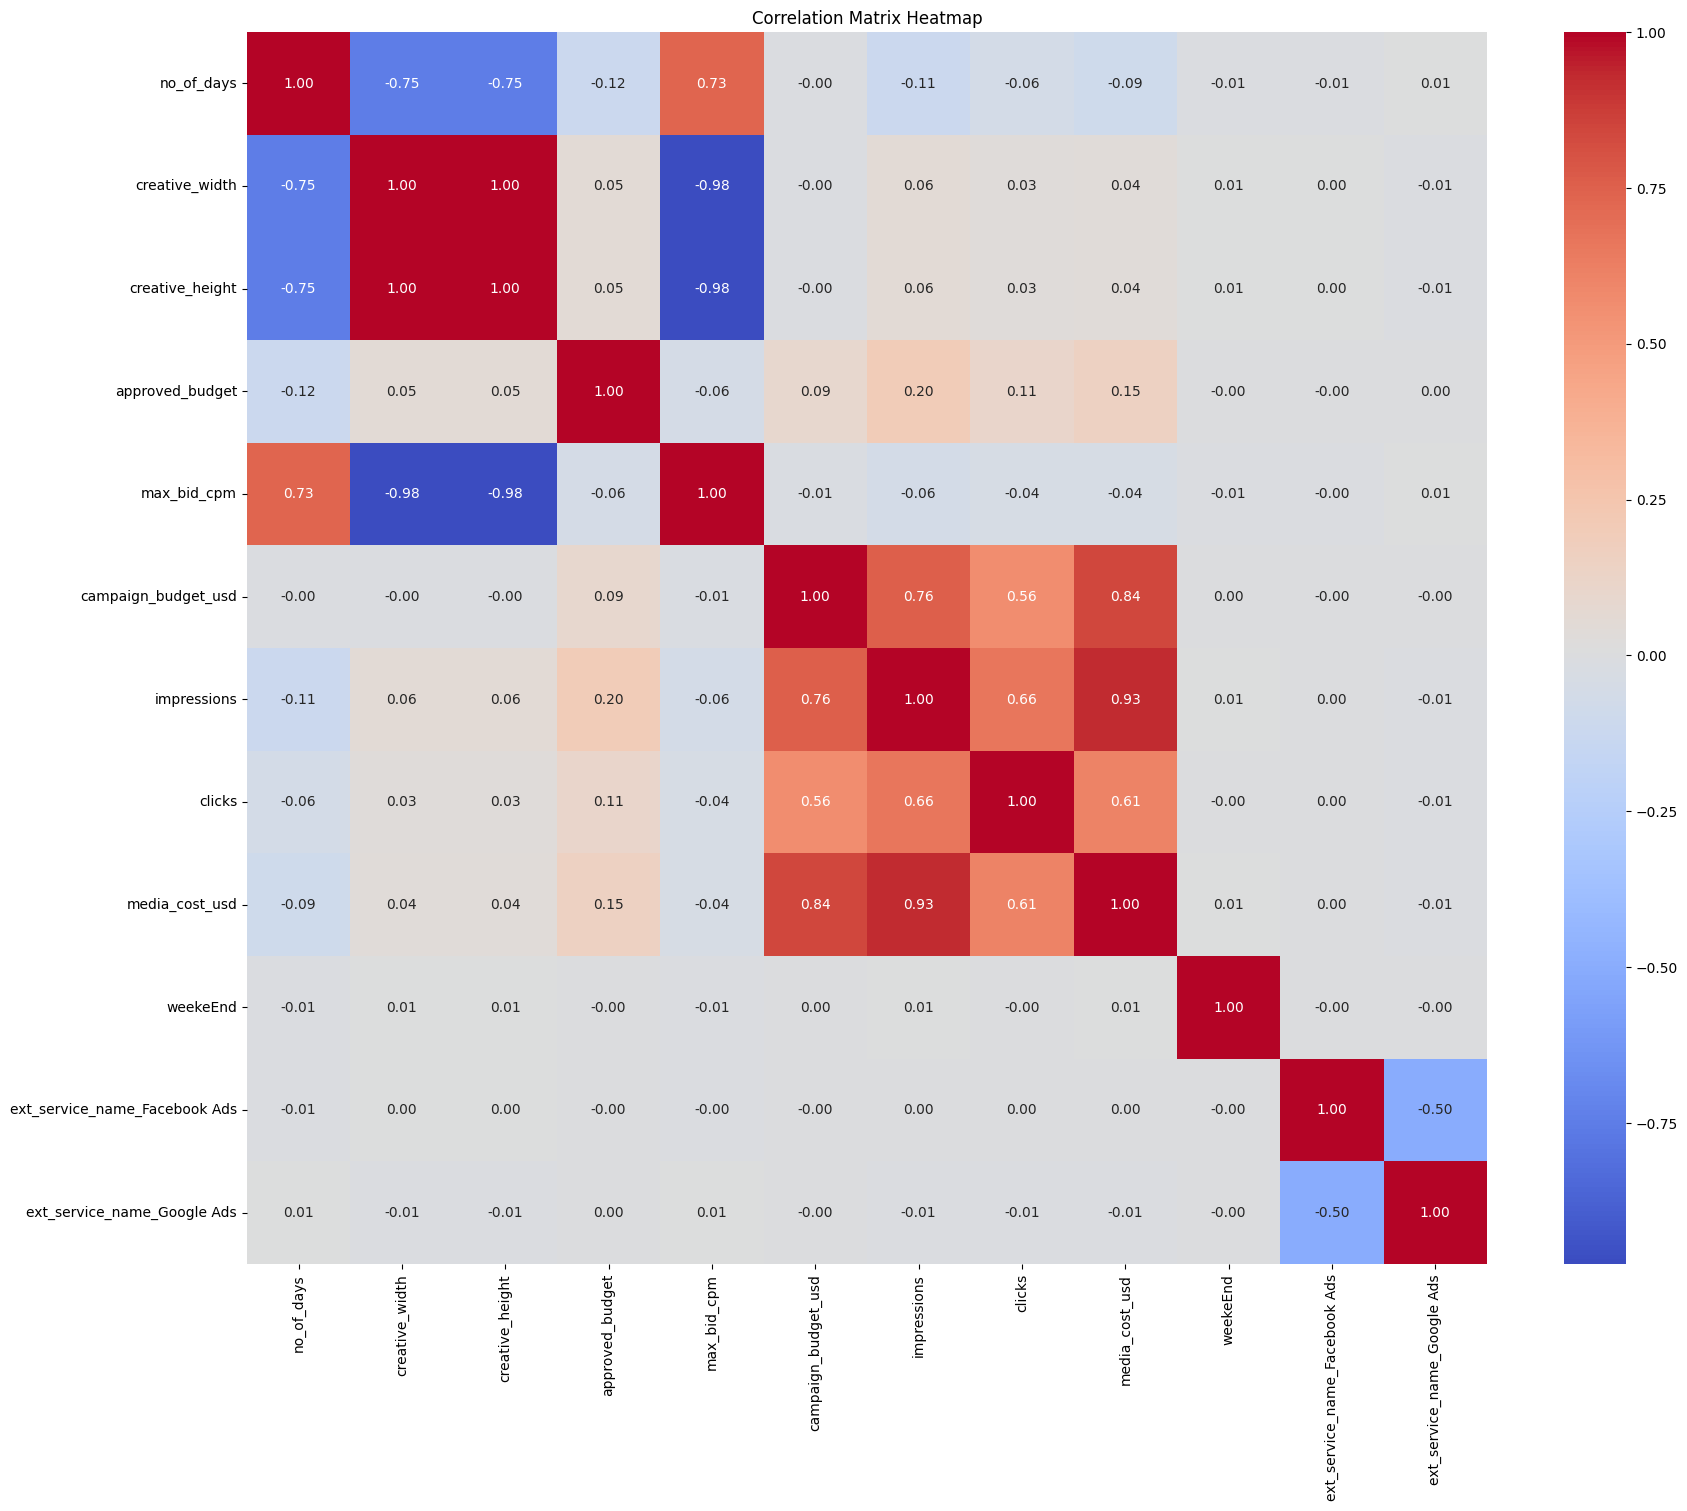

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = db_dummies.select_dtypes(include=['number', 'bool']).corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

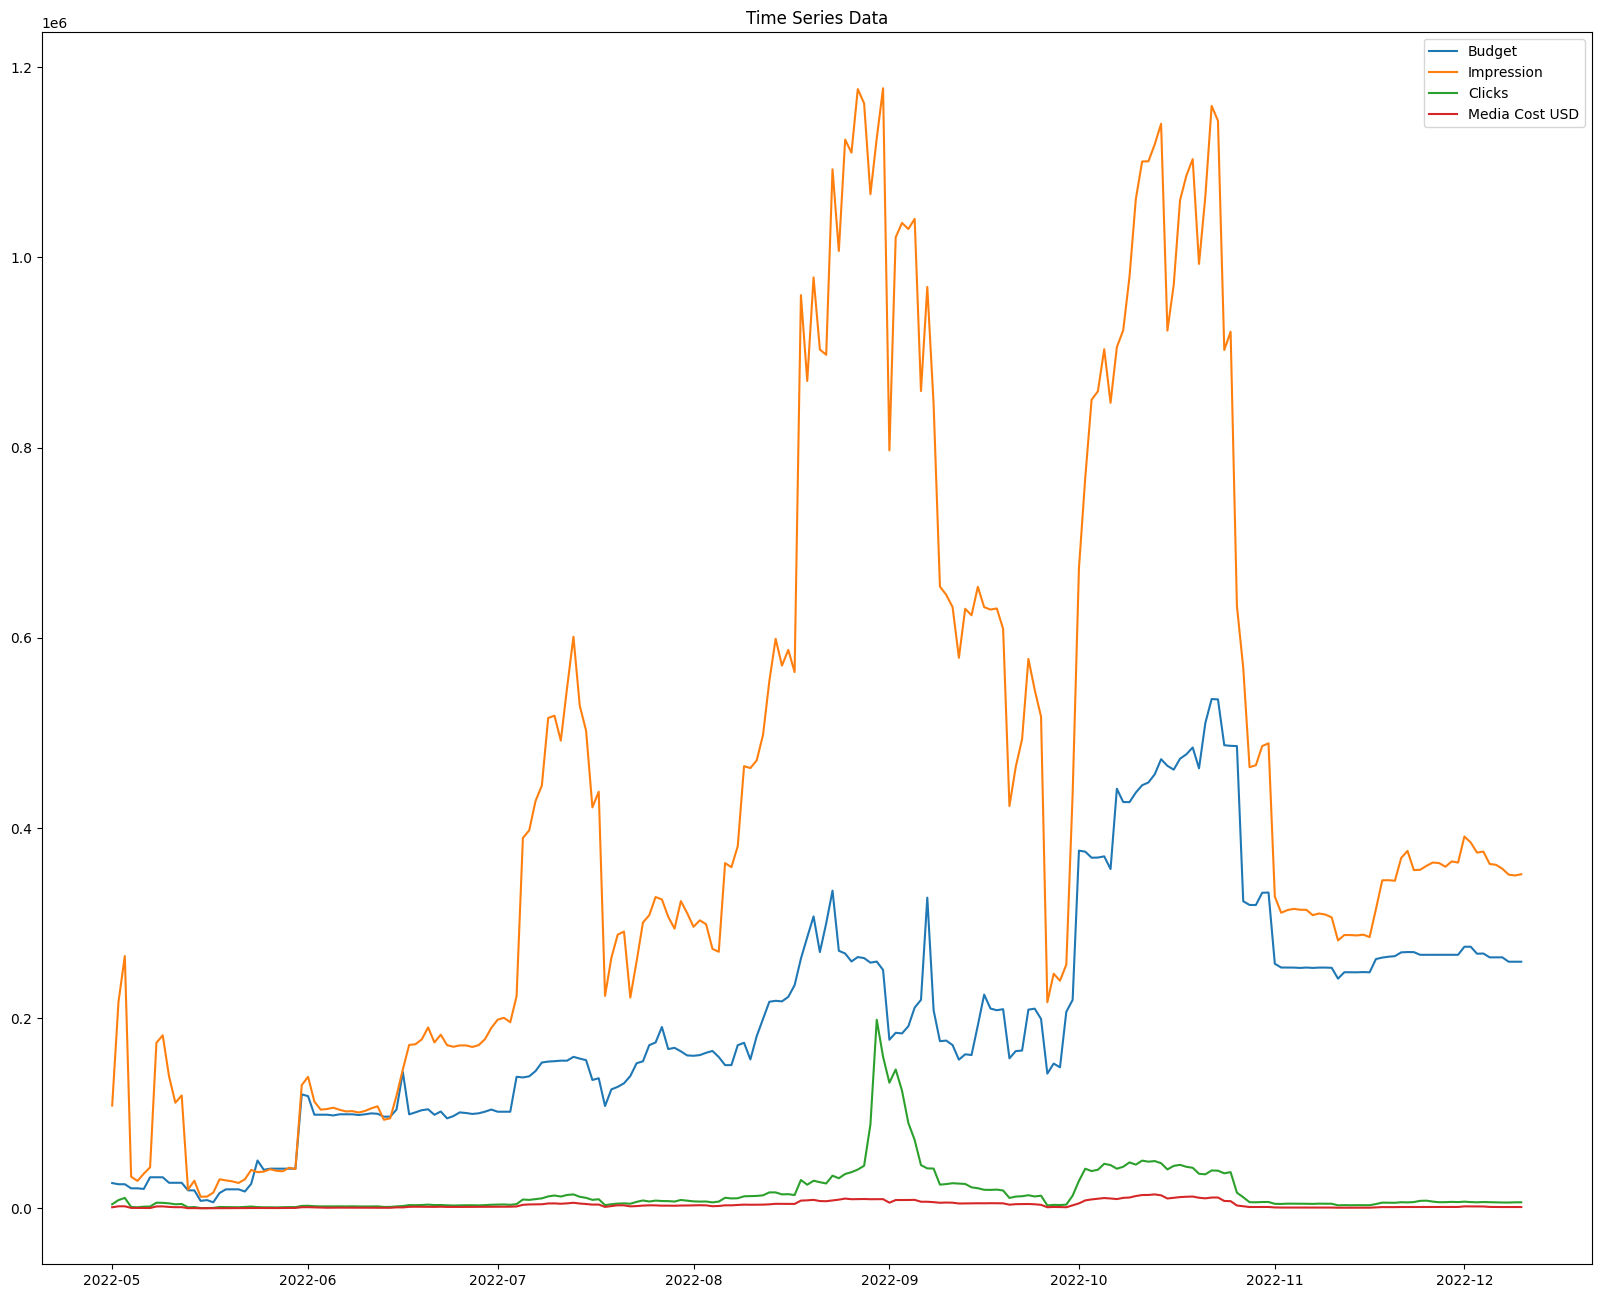

In [ ]:
# Create time series tables for budget, impression, clicks, media_cost_usd
db_dummies.set_index('time', inplace=True)
db_dummies.sort_index(inplace=True)

# Copying the databases
df_budget = db_dummies['campaign_budget_usd']
df_impression = db_dummies['impressions']
df_clicks = db_dummies['clicks']
df_media_cost_usd = db_dummies['media_cost_usd']

# Resampling the data
df_resampled_budget = df_budget.resample('D').sum()
df_resampled_impression = df_impression.resample('D').sum()
df_resampled_clicks = df_clicks.resample('D').sum()
df_media_cost_usd = df_media_cost_usd.resample('D').sum()

# Plotting the data
plt.figure(figsize=(20, 16))
plt.plot(df_resampled_budget, label='Budget')
plt.plot(df_resampled_impression, label='Impressions')
plt.plot(df_resampled_clicks, label='Clicks')
plt.plot(df_media_cost_usd, label='Media Cost USD')
plt.legend()
plt.title('Time Series Data')
plt.show()

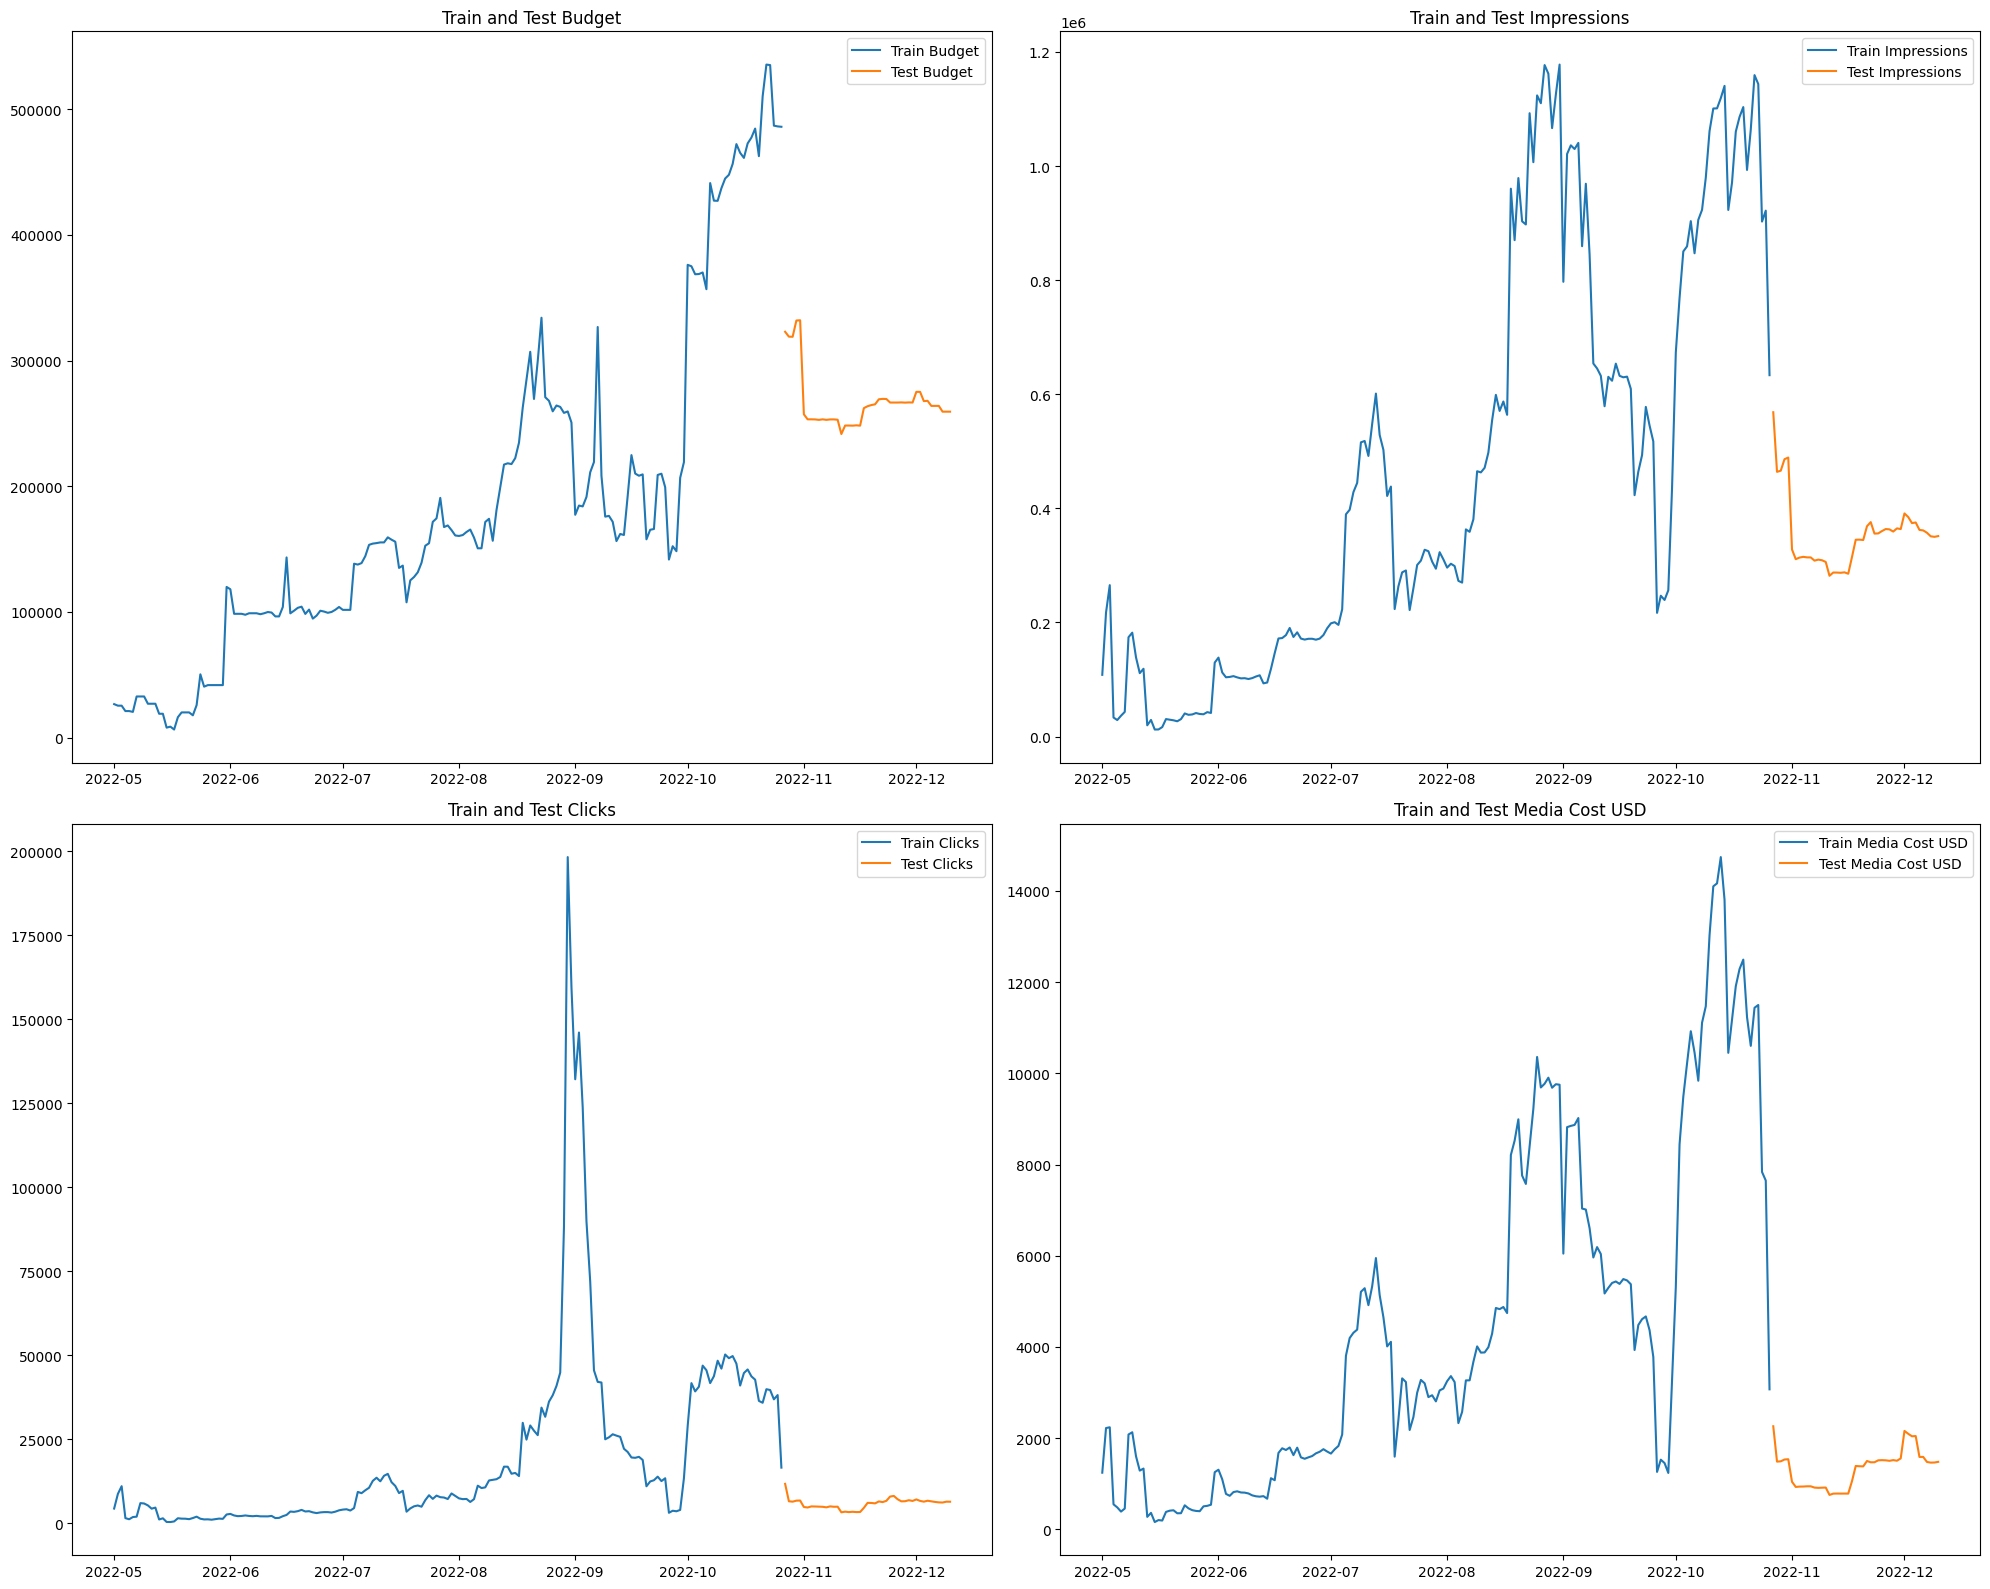

In [ ]:
# split the data into training and testing
train_size = int(len(df_resampled_budget) * 0.8)
train_budget, test_budget = df_resampled_budget[:train_size], df_resampled_budget[train_size:]
train_impression, test_impression = df_resampled_impression[:train_size], df_resampled_impression[train_size:]
train_clicks, test_clicks = df_resampled_clicks[:train_size], df_resampled_clicks[train_size:]
train_media_cost_usd, test_media_cost_usd = df_media_cost_usd[:train_size], df_media_cost_usd[train_size:]

fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Plot train and test budget
axs[0, 0].plot(train_budget, label='Train Budget')
axs[0, 0].plot(test_budget, label='Test Budget')
axs[0, 0].set_title('Train and Test Budget')
axs[0, 0].legend()

# Plot train and test impressions
axs[0, 1].plot(train_impression, label='Train Impressions')
axs[0, 1].plot(test_impression, label='Test Impressions')
axs[0, 1].set_title('Train and Test Impressions')
axs[0, 1].legend()

# Plot train and test clicks
axs[1, 0].plot(train_clicks, label='Train Clicks')
axs[1, 0].plot(test_clicks, label='Test Clicks')
axs[1, 0].set_title('Train and Test Clicks')
axs[1, 0].legend()

# Plot train and test media cost USD
axs[1, 1].plot(train_media_cost_usd, label='Train Media Cost USD')
axs[1, 1].plot(test_media_cost_usd, label='Test Media Cost USD')
axs[1, 1].set_title('Train and Test Media Cost USD')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Auto arima models
from pmdarima import auto_arima
arima_budget = auto_arima(train_budget, seasonal=True, m=7, stepwise=True)
arima_impression = auto_arima(train_impression, seasonal=True, m=7, stepwise=True)
arima_clicks = auto_arima(train_clicks, seasonal=True, m=7, stepwise=True)
arima_media_cost_usd = auto_arima(train_media_cost_usd, seasonal=True, m=7, stepwise=True)


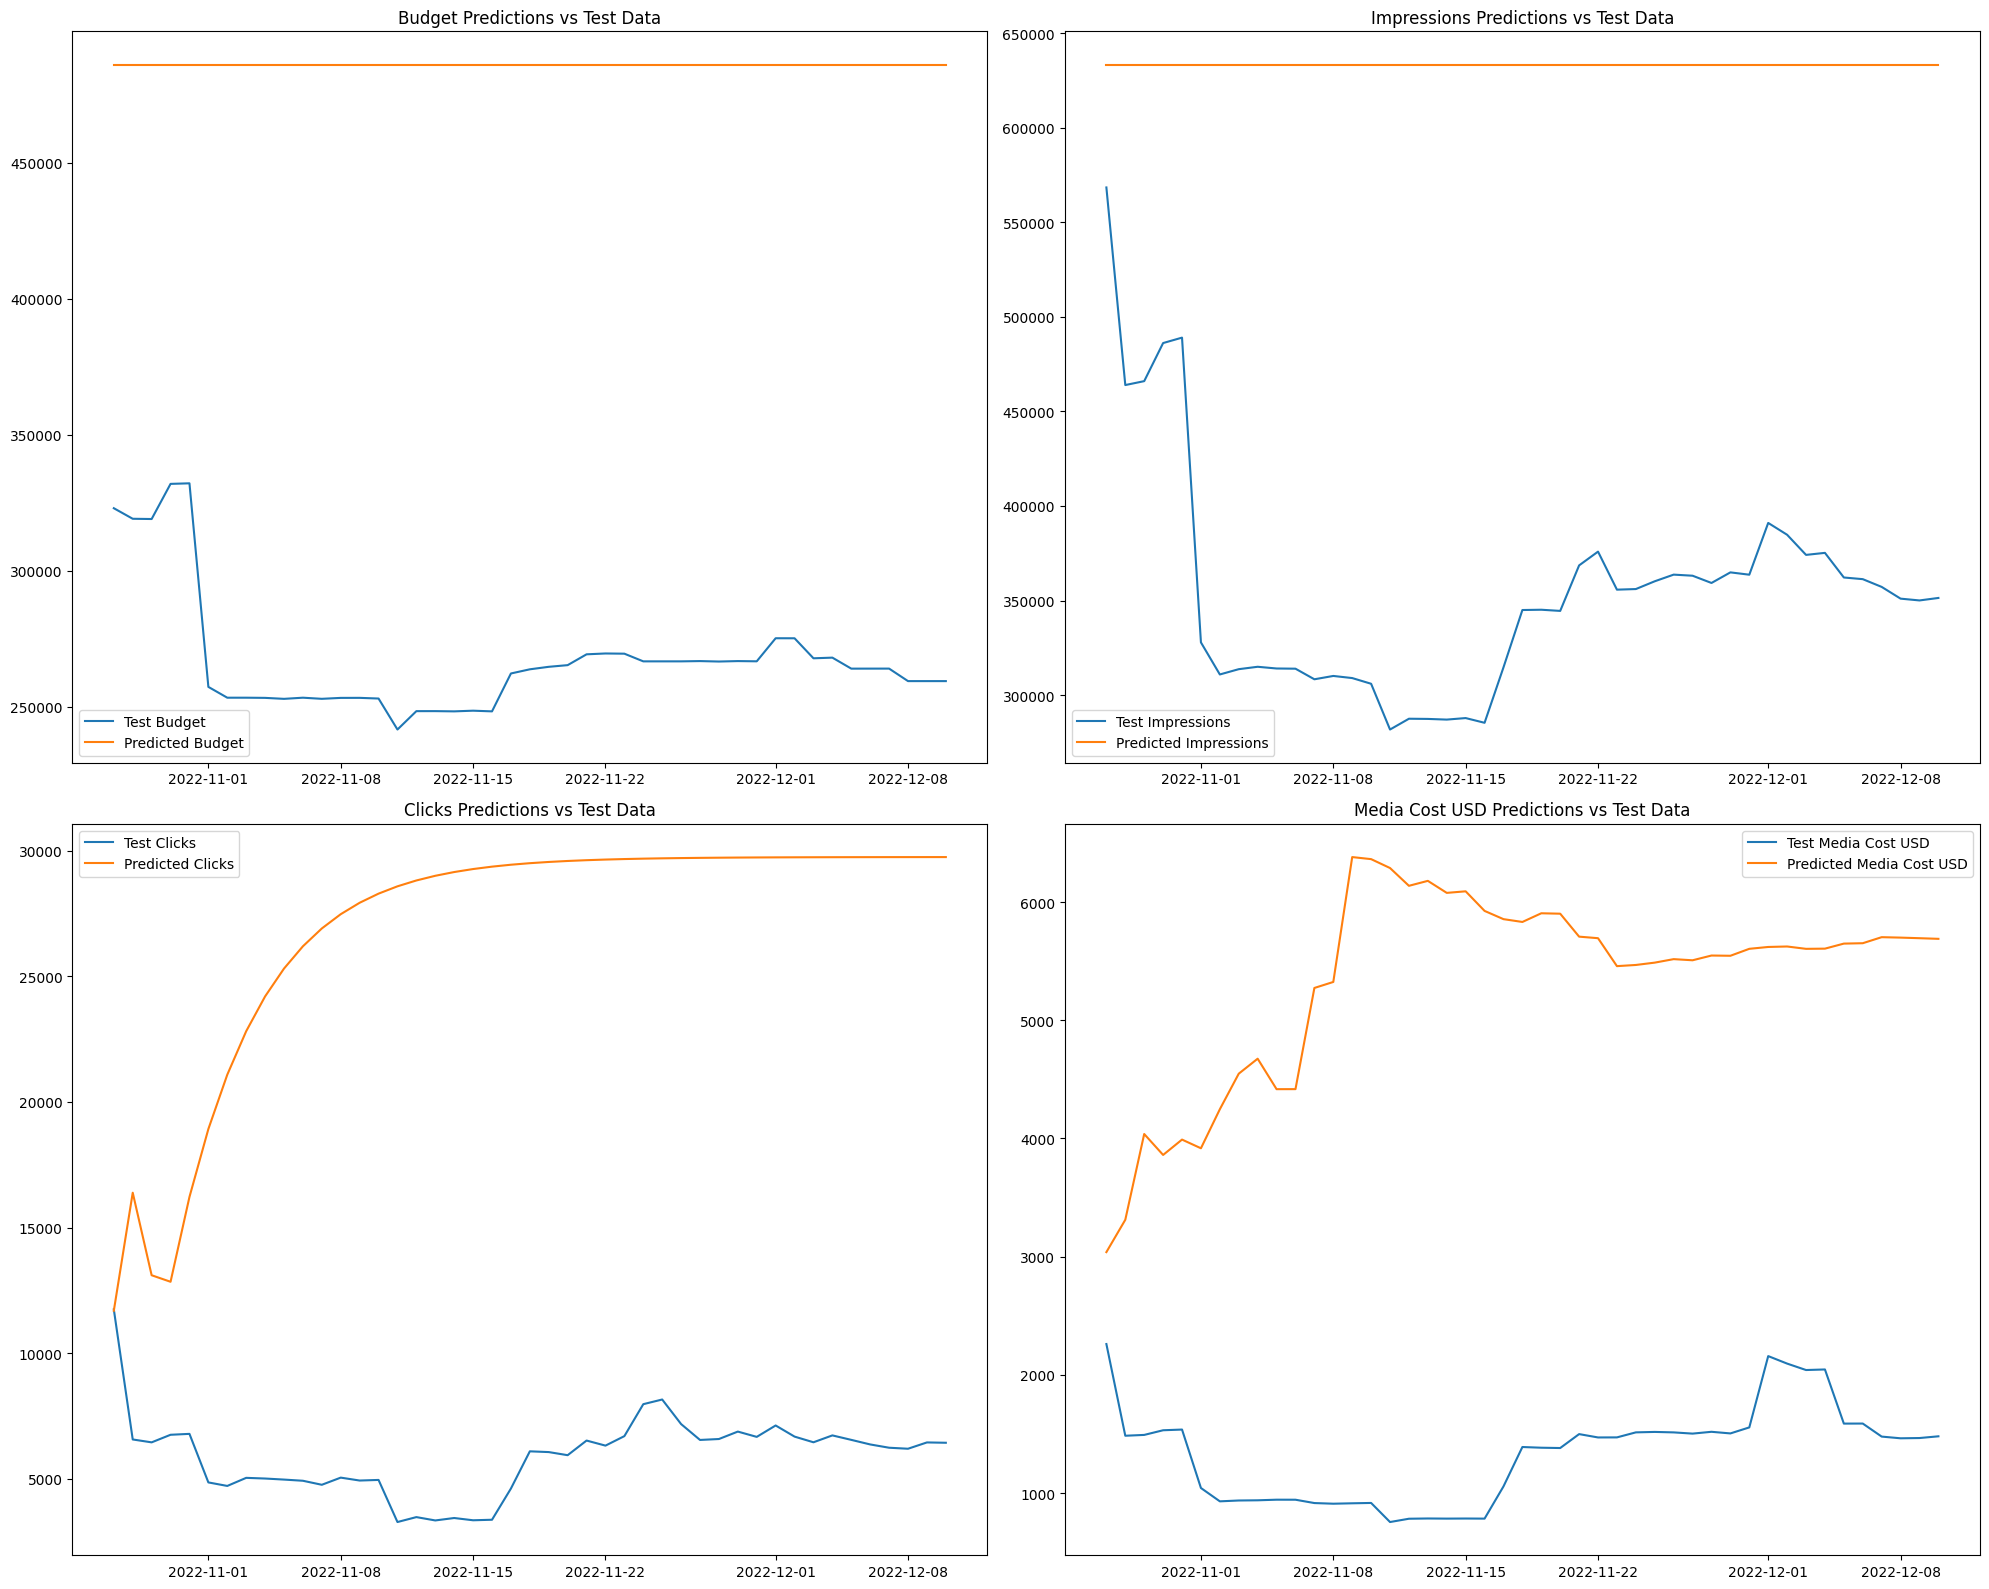

In [ ]:
predictions_budget = arima_budget.predict(n_periods=len(test_budget))
predictions_impression = arima_impression.predict(n_periods=len(test_impression))
predictions_clicks = arima_clicks.predict(n_periods=len(test_clicks))
predictions_media_cost_usd = arima_media_cost_usd.predict(n_periods=len(test_media_cost_usd))

# Plotting the predictions vs the test data
fig, axs = plt.subplots(2, 2, figsize=(20, 16))

# Plot budget predictions
axs[0, 0].plot(test_budget.index, test_budget, label='Test Budget')
axs[0, 0].plot(test_budget.index, predictions_budget, label='Predicted Budget')
axs[0, 0].set_title('Budget Predictions vs Test Data')
axs[0, 0].legend()

# Plot impression predictions
axs[0, 1].plot(test_impression.index, test_impression, label='Test Impressions')
axs[0, 1].plot(test_impression.index, predictions_impression, label='Predicted Impressions')
axs[0, 1].set_title('Impressions Predictions vs Test Data')
axs[0, 1].legend()

# Plot clicks predictions
axs[1, 0].plot(test_clicks.index, test_clicks, label='Test Clicks')
axs[1, 0].plot(test_clicks.index, predictions_clicks, label='Predicted Clicks')
axs[1, 0].set_title('Clicks Predictions vs Test Data')
axs[1, 0].legend()

# Plot media cost USD predictions
axs[1, 1].plot(test_media_cost_usd.index, test_media_cost_usd, label='Test Media Cost USD')
axs[1, 1].plot(test_media_cost_usd.index, predictions_media_cost_usd, label='Predicted Media Cost USD')
axs[1, 1].set_title('Media Cost USD Predictions vs Test Data')
axs[1, 1].legend()

plt.tight_layout()
plt.show()

In [ ]:
# Clearly the model is not performing well. 

In [ ]:
print(db_dummies.columns)